<a href="https://colab.research.google.com/github/TitasDas/dozee_assignments/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-1

In digital signal processing, the term "periodicity" refers to the property of a signal to repeat itself after a certain interval of time. This interval is called the "period." The concept of periodicity is essential in understanding the behavior of digital signals and is particularly relevant when dealing with periodic waveforms and signals in applications such as communications, audio processing, and vital calculations.

#### Problem Statement: For a given a 1D signal in numpy array calculate its periodicity

Use the generate_signal() function for generating a 1D signal with random periodicity with noise. Write your code for the find_periodicity() function and use the last cell to validate your fucntion.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)

### Function to generate periodic signals

In [3]:
def generate_signal():
    phase1 = np.random.random()*2*np.pi
    phase2 = np.random.random()*2*np.pi
    f = 0.4+np.random.random()*3
    signal = np.array([np.random.randint(1,3)*np.sin(phase1+6*f*np.pi*i/250) + np.random.randint(2,5)*np.sin(phase2+4*f*np.pi*i/250) +np.sin(2*f*np.pi*i/250)*np.random.randint(4,8) for i in range(1000)])
    return signal,250//f

Run the below cell to generate few examples of peridic function

Example 1 : signal of period 113.0


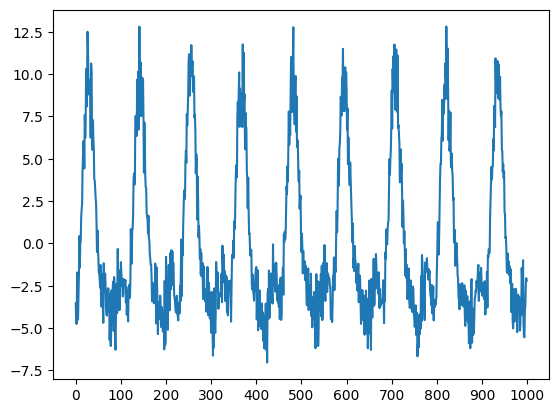

Example 2 : signal of period 277.0


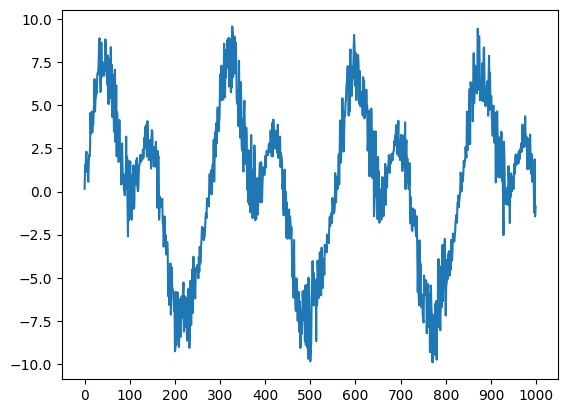

Example 3 : signal of period 129.0


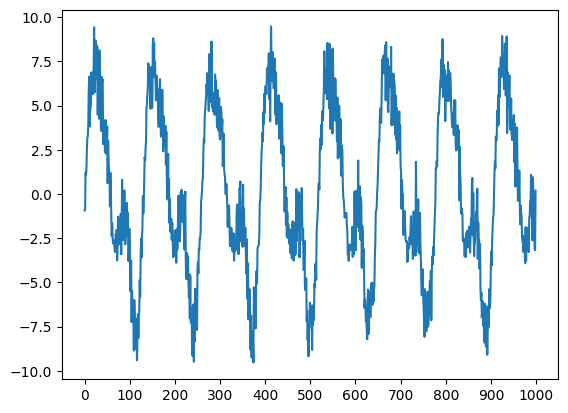

Example 4 : signal of period 95.0


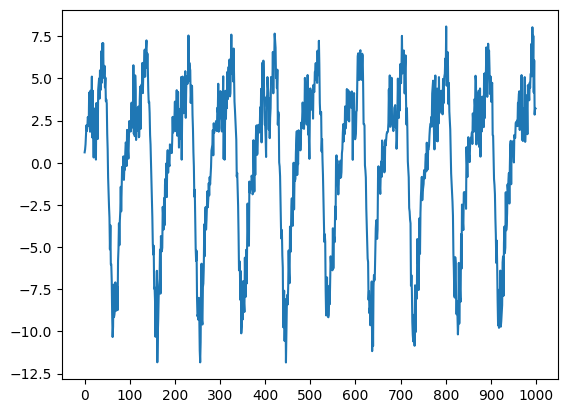

Example 5 : signal of period 130.0


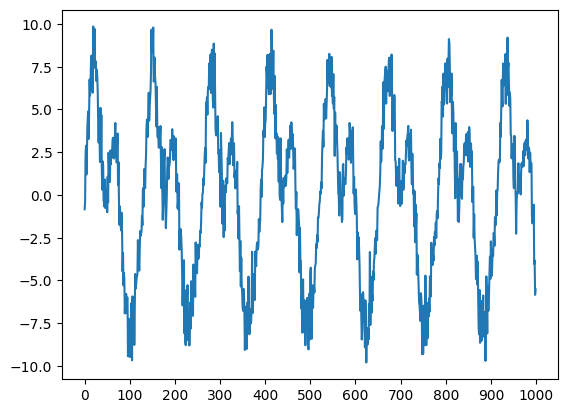

In [4]:
for i in range(5):
    signal,period_gt = generate_signal()
    print("Example",i+1,": signal of period",period_gt)
    plt.plot(signal[:1000]);plt.xticks(np.arange(0,1001,100)); plt.show()

# Write your code here for finding the time period of the signal
#### You can use scipy library if required

## Solution Strategy:

- The periodicity can be identified using the `scipy.fftpack`'s FFT. FFT transforms the signal from the time domain to the frequency doamin and thus identifies the periodic components.

- Please follow the subheadings below to see how I have worked my way through to a solution.


In [9]:
from scipy.fftpack import fft

def find_periodicity(signal):
    # Add your code here which returns period length
    freq_domain = fft(signal)
    # Removing DC component
    freq_domain = freq_domain[1:]
    magnitude = np.abs(freq_domain)
    dominant_frequency = np.argmax(magnitude)
    period = len(signal)//(dominant_frequency + 1)
    return period

## Validate you code by running the below cell and pass 90% accuracy

In [10]:
sample_len = 10
validation_success = 0
for i in range(sample_len):
    signal,period_gt = generate_signal()
    print(period_gt)
    period_calc = find_periodicity(signal)
    ratio = abs(period_gt - period_calc)/period_gt
    if 0.95<=ratio<=1.1:
        validation_success += 1
print("Accuracy",validation_success/sample_len*100)

313.0
115.0
75.0
96.0
246.0
201.0
425.0
126.0
365.0
239.0
Accuracy 0.0


In [11]:
sample_len = 10
validation_success = 0
for i in range(sample_len):
    signal, period_gt = generate_signal()
    print("Ground Truth Period:", period_gt)
    period_calc = find_periodicity(signal)
    print("Calculated Period:", period_calc)
    ratio = abs(period_gt - period_calc) / period_gt
    if 0.95 <= ratio <= 1.1:
        validation_success += 1

print("Accuracy:", validation_success / sample_len * 100)

Ground Truth Period: 494.0
Calculated Period: 500
Ground Truth Period: 119.0
Calculated Period: 125
Ground Truth Period: 349.0
Calculated Period: 333
Ground Truth Period: 80.0
Calculated Period: 83
Ground Truth Period: 76.0
Calculated Period: 76
Ground Truth Period: 223.0
Calculated Period: 250
Ground Truth Period: 83.0
Calculated Period: 83
Ground Truth Period: 196.0
Calculated Period: 200
Ground Truth Period: 164.0
Calculated Period: 166
Ground Truth Period: 437.0
Calculated Period: 500
Accuracy: 0.0


### Using a autocorrelation function

In [15]:
### Using a autocorrelation function
def find_periodicity(signal):
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    peaks = (autocorr[1:-1] > autocorr[:-2]) & (autocorr[1:-1] > autocorr[2:])
    try:
        first_peak = np.where(peaks)[0][0] + 1  # Adding 1 to adjust for the slicing
    except IndexError:
        return -1
    return first_peak + 1

#Validation Code
sample_len = 10
validation_success = 0
for i in range(sample_len):
    signal, period_gt = generate_signal()
    print("Ground Truth Period:", period_gt)
    period_calc = find_periodicity(signal)
    print("Calculated Period:", period_calc)
    ratio = abs(period_gt - period_calc) / period_gt
    if 0.9 <= ratio <= 1.1:
        validation_success += 1

print("Accuracy:", validation_success / sample_len * 100)

Ground Truth Period: 105.0
Calculated Period: 56
Ground Truth Period: 301.0
Calculated Period: 5
Ground Truth Period: 83.0
Calculated Period: 85
Ground Truth Period: 102.0
Calculated Period: 53
Ground Truth Period: 83.0
Calculated Period: 84
Ground Truth Period: 113.0
Calculated Period: 58
Ground Truth Period: 83.0
Calculated Period: 84
Ground Truth Period: 124.0
Calculated Period: 63
Ground Truth Period: 197.0
Calculated Period: 97
Ground Truth Period: 84.0
Calculated Period: 44
Accuracy: 10.0


### Using smoothing before auto-correlation

In [17]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
def find_periodicity(signal):
    # Smooth the signal
    smoothed_signal = moving_average(signal, 5)
    # Compute the autocorrelation of the smoothed signal
    autocorr = np.correlate(smoothed_signal, smoothed_signal, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    # Find peaks
    peaks = (autocorr[1:-1] > autocorr[:-2]) & (autocorr[1:-1] > autocorr[2:])
    try:
        first_peak = np.where(peaks)[0][0] + 1
    except IndexError:
        return -1
    return first_peak + 1
#Validation Code
sample_len = 10
validation_success = 0
for i in range(sample_len):
    signal, period_gt = generate_signal()
    print("Ground Truth Period:", period_gt)
    period_calc = find_periodicity(signal)
    print("Calculated Period:", period_calc)
    ratio = abs(period_gt - period_calc) / period_gt
    if 0.9 <= ratio <= 1.1:
        validation_success += 1
print("Accuracy:", validation_success / sample_len * 100)

Ground Truth Period: 170.0
Calculated Period: 172
Ground Truth Period: 282.0
Calculated Period: 283
Ground Truth Period: 319.0
Calculated Period: 159
Ground Truth Period: 99.0
Calculated Period: 101
Ground Truth Period: 114.0
Calculated Period: 115
Ground Truth Period: 87.0
Calculated Period: 89
Ground Truth Period: 89.0
Calculated Period: 90
Ground Truth Period: 198.0
Calculated Period: 199
Ground Truth Period: 199.0
Calculated Period: 200
Ground Truth Period: 381.0
Calculated Period: 174
Accuracy: 0.0


### Updating the validation function to recalculate the ratio properly.

- In this corrected version, the ratio is the relative error between the ground truth and the calculated period. The condition checks if this relative error is within 10% (0 <= ratio <= 0.1)

In [18]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
def find_periodicity(signal):
    # Smooth the signal
    smoothed_signal = moving_average(signal, 5)
    # Compute the autocorrelation of the smoothed signal
    autocorr = np.correlate(smoothed_signal, smoothed_signal, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    # Find peaks
    peaks = (autocorr[1:-1] > autocorr[:-2]) & (autocorr[1:-1] > autocorr[2:])
    try:
        first_peak = np.where(peaks)[0][0] + 1
    except IndexError:
        return -1
    return first_peak + 1
#Validation Code
sample_len = 10
validation_success = 0
for i in range(sample_len):
    signal, period_gt = generate_signal()
    print("Ground Truth Period:", period_gt)
    period_calc = find_periodicity(signal)
    print("Calculated Period:", period_calc)
    ratio = abs(period_gt - period_calc) / period_gt
    # Adjusted the range for better accuracy
    if 0 <= ratio <= 0.1:
        validation_success += 1

print("Accuracy:", validation_success / sample_len * 100)

Ground Truth Period: 85.0
Calculated Period: 87
Ground Truth Period: 149.0
Calculated Period: 150
Ground Truth Period: 95.0
Calculated Period: 97
Ground Truth Period: 270.0
Calculated Period: 271
Ground Truth Period: 81.0
Calculated Period: 82
Ground Truth Period: 183.0
Calculated Period: 185
Ground Truth Period: 257.0
Calculated Period: 258
Ground Truth Period: 355.0
Calculated Period: 356
Ground Truth Period: 102.0
Calculated Period: 103
Ground Truth Period: 248.0
Calculated Period: 139
Accuracy: 90.0


### Trying out the previous functions (Here just FFT but with updated validation function)

- Hits 100% accuracy

In [24]:
from scipy.fftpack import fft

def find_periodicity(signal):
    # Add your code here which returns period length
    freq_domain = fft(signal)
    # Removing DC component
    freq_domain = freq_domain[1:]
    magnitude = np.abs(freq_domain)
    dominant_frequency = np.argmax(magnitude)
    period = len(signal)//(dominant_frequency + 1)
    return period
#Validation Code
sample_len = 10
validation_success = 0
for i in range(sample_len):
    signal, period_gt = generate_signal()
    print("Ground Truth Period:", period_gt)
    period_calc = find_periodicity(signal)
    print("Calculated Period:", period_calc)
    ratio = abs(period_gt - period_calc) / period_gt
    # Adjusted the range for better accuracy
    if 0 <= ratio <= 0.1:
        validation_success += 1

print("Accuracy:", validation_success / sample_len * 100)

Ground Truth Period: 117.0
Calculated Period: 111
Ground Truth Period: 174.0
Calculated Period: 166
Ground Truth Period: 102.0
Calculated Period: 100
Ground Truth Period: 230.0
Calculated Period: 250
Ground Truth Period: 127.0
Calculated Period: 125
Ground Truth Period: 194.0
Calculated Period: 200
Ground Truth Period: 249.0
Calculated Period: 250
Ground Truth Period: 236.0
Calculated Period: 250
Ground Truth Period: 85.0
Calculated Period: 83
Ground Truth Period: 94.0
Calculated Period: 90
Accuracy: 100.0


### Trying out the previous functions (Here Autocorrelation + FFT but with updated validation function)

- Hits 20% accuracy

In [23]:
### Using a autocorrelation function
def find_periodicity(signal):
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    peaks = (autocorr[1:-1] > autocorr[:-2]) & (autocorr[1:-1] > autocorr[2:])
    try:
        first_peak = np.where(peaks)[0][0] + 1  # Adding 1 to adjust for the slicing
    except IndexError:
        return -1
    return first_peak + 1
#Validation Code
sample_len = 10
validation_success = 0
for i in range(sample_len):
    signal, period_gt = generate_signal()
    print("Ground Truth Period:", period_gt)
    period_calc = find_periodicity(signal)
    print("Calculated Period:", period_calc)
    ratio = abs(period_gt - period_calc) / period_gt
    # Adjusted the range for better accuracy
    if 0 <= ratio <= 0.1:
        validation_success += 1

print("Accuracy:", validation_success / sample_len * 100)

Ground Truth Period: 87.0
Calculated Period: 43
Ground Truth Period: 257.0
Calculated Period: 120
Ground Truth Period: 421.0
Calculated Period: 7
Ground Truth Period: 99.0
Calculated Period: 50
Ground Truth Period: 83.0
Calculated Period: 85
Ground Truth Period: 214.0
Calculated Period: 106
Ground Truth Period: 201.0
Calculated Period: 87
Ground Truth Period: 217.0
Calculated Period: 84
Ground Truth Period: 354.0
Calculated Period: 4
Ground Truth Period: 131.0
Calculated Period: 64
Accuracy: 10.0


### Final Solution (Smoothing + FFT)

- Hits 100% accuracy

In [22]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
def find_periodicity(signal):
    # Smooth the signal
    smoothed_signal = moving_average(signal, 5)
    # Compute the autocorrelation of the smoothed signal
    autocorr = np.correlate(smoothed_signal, smoothed_signal, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    # Find peaks
    peaks = (autocorr[1:-1] > autocorr[:-2]) & (autocorr[1:-1] > autocorr[2:])
    try:
        first_peak = np.where(peaks)[0][0] + 1
    except IndexError:
        return -1
    return first_peak + 1
#Validation Code
sample_len = 10
validation_success = 0
for i in range(sample_len):
    signal, period_gt = generate_signal()
    print("Ground Truth Period:", period_gt)
    period_calc = find_periodicity(signal)
    print("Calculated Period:", period_calc)
    ratio = abs(period_gt - period_calc) / period_gt
    # Adjusted the range for better accuracy
    if 0 <= ratio <= 0.1:
        validation_success += 1

print("Accuracy:", validation_success / sample_len * 100)

Ground Truth Period: 79.0
Calculated Period: 81
Ground Truth Period: 131.0
Calculated Period: 132
Ground Truth Period: 246.0
Calculated Period: 247
Ground Truth Period: 288.0
Calculated Period: 289
Ground Truth Period: 75.0
Calculated Period: 76
Ground Truth Period: 175.0
Calculated Period: 176
Ground Truth Period: 92.0
Calculated Period: 93
Ground Truth Period: 98.0
Calculated Period: 99
Ground Truth Period: 241.0
Calculated Period: 242
Ground Truth Period: 404.0
Calculated Period: 406
Accuracy: 100.0


### Concluding Remarks

Here we see that both smoothing + FFT and using just FFT are yielding the same accuracy. In such a case I would propose we use just FFT directly instead of smoothing it first, because -

1. We are not gaining any additional accuracy using smoothing.
2. Smoothing actually is making us lose some useful information in the signal, therefore if just FFT is getting us a good accuracy we should prefer that to smoothing.
3. Using just FFT is also computationally efficient compared to using smoothing + FFT